User Satisfaction Analysis

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\Niti\NEXT HIKES\PROJECT 5\Telecom_data for 4th question.xlsx')

Task 4. 1 - Write a Python program to assign:
a.	engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)
b.	experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster. 

Euclidean Distance

In [3]:
from scipy.spatial import distance

In [4]:
engagement_metrics = df[['session_frequency', 'Dur. (s)', 'Total_data']]

In [5]:
experience_metrics = df[['Aggregate_TCP', 'Aggregate_RTT', 'Aggregate_TP']]

Because of large data, we have taken sample size of 1000 in order to calculate Euclidean Distance

In [6]:
from sklearn.metrics import euclidean_distances

In [7]:
sample_size = 1000  # Adjust the sample size as needed
df_sample = df.sample(n=sample_size, random_state=42)

engagement_score = df_sample['engagement_score'].values.reshape(-1, 1)
experience_score = df_sample['experience_score'].values.reshape(-1, 1)
euclidean_distance = euclidean_distances(engagement_score, experience_score)
euclidean_distance


array([[8., 8., 8., ..., 8., 7., 0.],
       [0., 0., 0., ..., 0., 1., 8.],
       [5., 5., 5., ..., 5., 4., 3.],
       ...,
       [4., 4., 4., ..., 4., 3., 4.],
       [2., 2., 2., ..., 2., 1., 6.],
       [2., 2., 2., ..., 2., 1., 6.]])

Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 


In [8]:
satisfaction_score = df[['engagement_score', 'experience_score']].mean()

In [9]:
satisfaction_score

engagement_score    4.038720
experience_score    1.629756
dtype: float64

In [10]:
satisfaction_score = df[['engagement_score', 'experience_score']].mean(axis = 1)

Making satisfaction score a column

In [11]:
df['satisfaction_score'] = satisfaction_score

Top 10 Satisfied Customers

In [13]:
top_10_satisfied_customers=df.sort_values('satisfaction_score',ascending= False)[['MSISDN/Number', 'satisfaction_score']][:10]
top_10_satisfied_customers

,MSISDN/Number,satisfaction_score
28844,3.364670e+10,8.0
57618,3.366082e+10,8.0
116824,3.369595e+10,8.0
95091,3.366809e+10,8.0
148657,3.378842e+10,8.0
116821,3.369594e+10,8.0
105779,3.367461e+10,8.0
57629,3.366082e+10,8.0
12744,3.362006e+10,8.0
66226,3.366227e+10,8.0


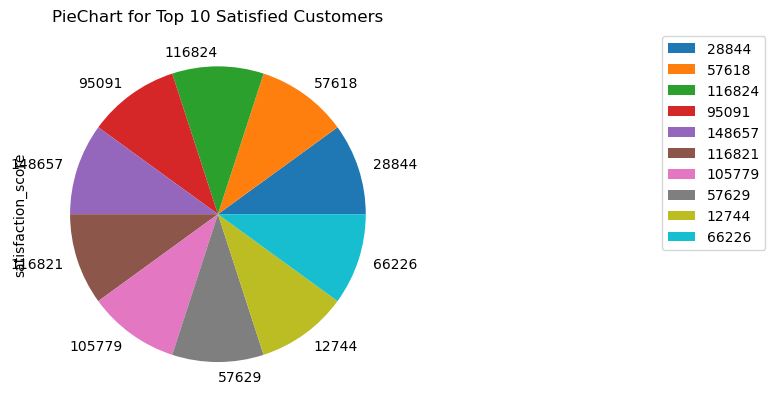

In [27]:
top_10_satisfied_customers.plot(kind='pie',y='satisfaction_score')
plt.title('PieChart for Top 10 Satisfied Customers')
plt.legend(bbox_to_anchor=(2,1), loc='upper right')

Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer. 

In [130]:
X = df[['MSISDN/Number','session_frequency','Dur. (s)','Total_data','Aggregate_TCP','Aggregate_RTT','Aggregate_TP' ]]
y = df['satisfaction_score']

We have taken engagement metrics and experience metrics as features alongwith customer id and Satisfaction Score is a Target 

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [133]:
#from sklearn.linear_model import LinearRegression
#satisfaction_model = LinearRegression()
#satisfaction_model

In [134]:
#satisfaction_model.fit(X_train,y_train)

In [135]:
#predictions = satisfaction_model.predict(X_test)


In [136]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
#mae = mean_absolute_error(y_test, predictions)
#mae

In [137]:
#mean_squared_error(y_test, predictions)

In [138]:
# root mean squared error
#np.sqrt(mean_squared_error(y_test, predictions))

In [139]:
#r2_score = r2_score(y_test, predictions)
#r2_score

Linear Regression scoring is not good for this data..so we ll use Random Forest Regressor

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
satisfaction_model = RandomForestRegressor()
satisfaction_model.fit(X_train, y_train)

RandomForestRegressor()

In [142]:
y_pred = satisfaction_model.predict(X_test)

In [143]:
satisfaction_model.score(X_test,y_test)

0.993668157008603

The accuracy is 0.99

In [47]:
df['satisfaction_score'].mean()

2.7937113752574985

In [144]:
satisfaction_model.feature_importances_

array([3.55273223e-04, 5.10296294e-02, 4.67039420e-02, 4.36800134e-01,
       2.07314127e-03, 3.30061197e-04, 4.62707819e-01])

In [145]:
X.columns

Index(['MSISDN/Number', 'session_frequency', 'Dur. (s)', 'Total_data',
       'Aggregate_TCP', 'Aggregate_RTT', 'Aggregate_TP'],
      dtype='object')

In [146]:
pd.DataFrame(index = X.columns, data = satisfaction_model.feature_importances_,
             columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
Aggregate_TP,0.462708
Total_data,0.436800
session_frequency,0.051030
Dur. (s),0.046704
Aggregate_TCP,0.002073
MSISDN/Number,0.000355
Aggregate_RTT,0.000330


We ll draw JointPlot for this Feature Importance Analysis

c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

<Figure size 2400x1000 with 0 Axes>

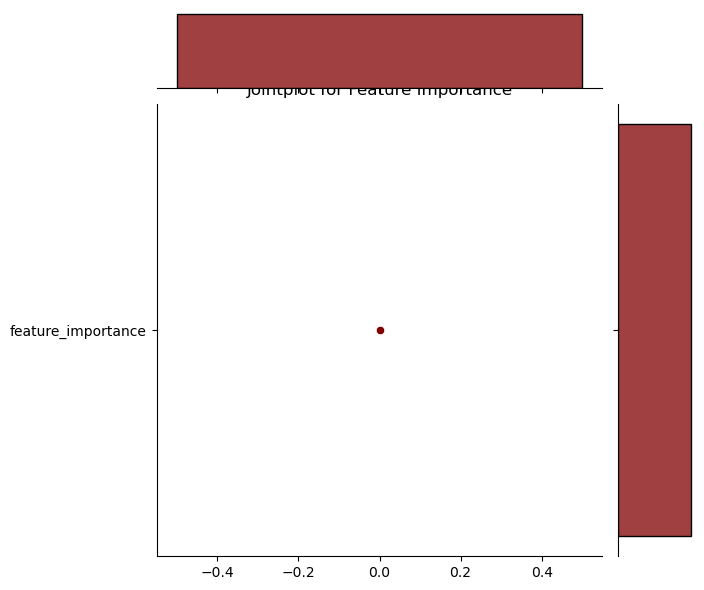

In [147]:
plt.figure(figsize = (12,5), dpi = 200)
sns.jointplot('feature_importance', color = 'maroon')
plt.title('Jointplot for Feature Importance')
plt.show()

This JointPlot shows a single point between all the positive and negative values which means this chart is centered for this algorithm

c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'HistPlot for Satisfaction score')

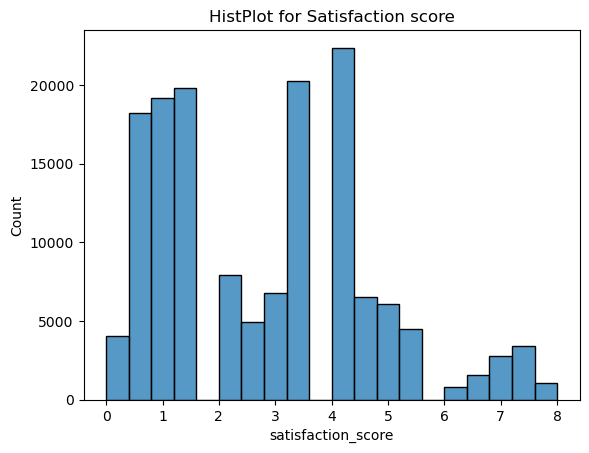

In [148]:
sns.histplot(x = df['satisfaction_score'], bins=20)
plt.title('HistPlot for Satisfaction score')

Difference between Actual and predicted

In [149]:
test_residuals = y_test - predictions
test_residuals

16311    -0.434299
102956   -2.632066
21093    -1.701439
48936    -0.405580
9774      1.421579
            ...   
141766   -1.585672
79684    -1.464257
98061     1.863357
109269    4.015060
132542    0.637119
Name: satisfaction_score, Length: 30001, dtype: float64

c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Scatterplot for Actual and predicted values')

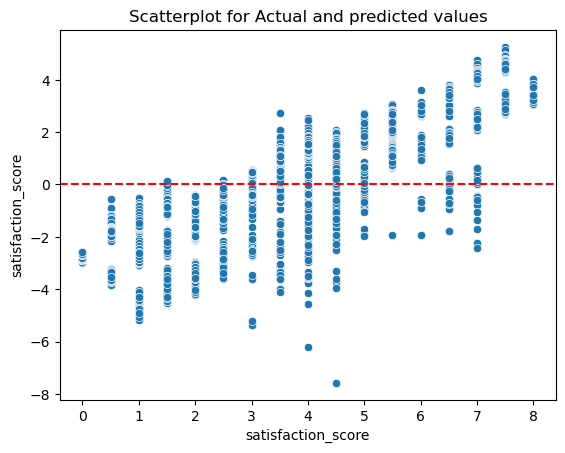

In [150]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y=0, color = 'r', ls = '--')
plt.title('Scatterplot for Actual and predicted values')

C:\Users\Niti\AppData\Local\Temp\ipykernel_5480\76380281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_residuals, bins = 20, kde = True)
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

Text(0.5, 1.0, 'Distplot for Difference')

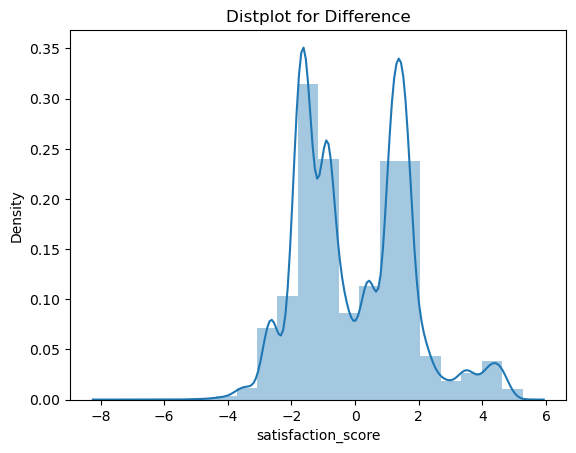

In [151]:
sns.distplot(test_residuals, bins = 20, kde = True)
plt.title('Distplot for Difference')

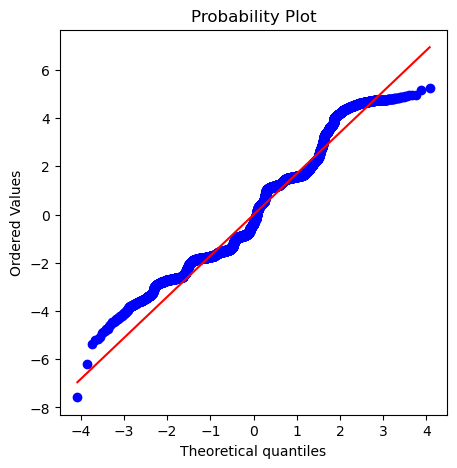

In [152]:
import scipy as sp
fig, ax = plt.subplots(figsize=(5,5), dpi = 100)
_ = sp.stats.probplot(test_residuals, plot = ax)

In [155]:
final_model = RandomForestRegressor()

In [156]:
final_model.fit(X_train, y_train)

RandomForestRegressor()

Model loading and final testing

In [157]:
input_features = X.head(5).set_index('MSISDN/Number')

In [158]:
actual_result = y.head(5)

In [159]:
input_features

,session_frequency,Dur. (s),Total_data,Aggregate_TCP,Aggregate_RTT,Aggregate_TP
MSISDN/Number,,,,,,
3.360100e+10,1.285135,116720.0,878690574.0,2.156957e+07,46.000000,76.0
3.360100e+10,0.827683,181230.0,156859643.0,2.156957e+07,31.000000,99.0
3.360100e+10,1.111374,134969.0,595966483.0,2.156957e+07,127.458589,97.0
3.360101e+10,3.007358,49878.0,422320698.0,7.607247e+05,84.000000,248.0
3.360101e+10,8.086743,18549.0,585578364.0,2.156957e+07,28.000000,63.0


In [160]:
input_features.to_csv('input_features.csv')

In [161]:
final_prediction = final_model.predict(input_features)
final_prediction

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- MSISDN/Number


In [ ]:
final_result = pd.DataFrame(index=actual_result, data= final_prediction, columns=['final_prediction'])
final_result

,final_prediction
satisfaction_score,
0.5,0.5
1.0,1.0
3.5,3.5
1.5,1.5
3.0,3.0


In [ ]:
final_result.to_csv('final_result.csv')

Text(0, 0.5, 'Predicted Result')

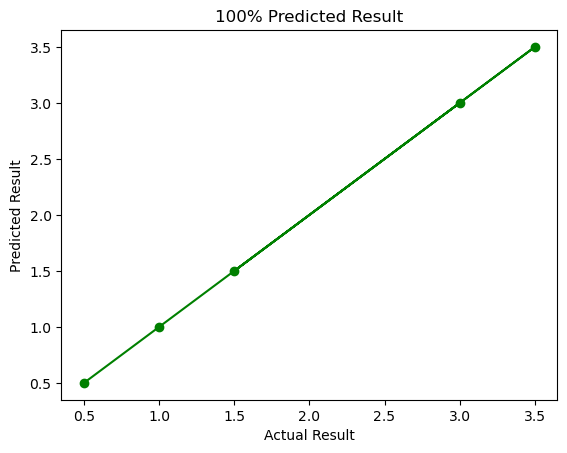

In [ ]:
plt.plot(actual_result, final_prediction, marker = 'o', color = 'green')
plt.title('100% Predicted Result')
plt.xlabel('Actual Result')
plt.ylabel('Predicted Result')

This is giving 100% result

Task 4.4 - Run a k-means (k=2) on the engagement & the experience score

In [162]:
satisfaction_X = df[['engagement_score', 'experience_score']]

Text(0.5, 1.0, 'ScatterPlot for Engagement and Experience Score ')

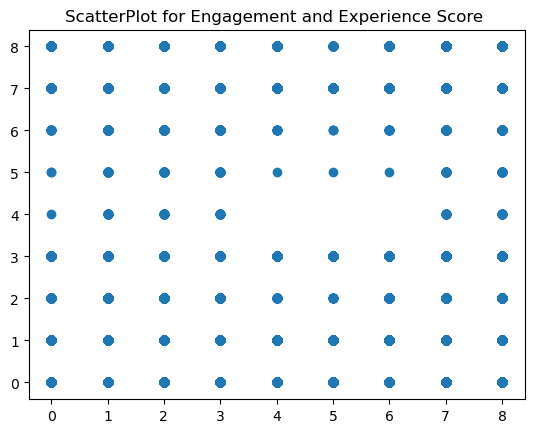

In [163]:
plt.scatter(df['engagement_score'], df['experience_score'])
plt.title('ScatterPlot for Engagement and Experience Score ')

Scaling

In [164]:
from sklearn.preprocessing import MinMaxScaler
satisfaction_scaler = MinMaxScaler()
satisfaction_scaled = satisfaction_scaler.fit_transform(satisfaction_X)
satisfaction_scaled

array([[0.125, 0.   ],
       [0.25 , 0.   ],
       [0.875, 0.   ],
       ...,
       [0.25 , 0.   ],
       [0.875, 0.   ],
       [0.25 , 0.   ]])

KMeans Clustering

In [165]:
from sklearn.cluster import KMeans
satisfaction_km = KMeans(n_clusters= 2)
df['satisfaction_cluster'] = satisfaction_km.fit_predict(satisfaction_X)

c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [166]:
df['satisfaction_cluster']

0         0
1         0
2         1
3         0
4         1
         ..
149996    0
149997    0
149998    0
149999    1
150000    0
Name: satisfaction_cluster, Length: 150001, dtype: int32

In [167]:
df['satisfaction_cluster'].unique()

array([0, 1])

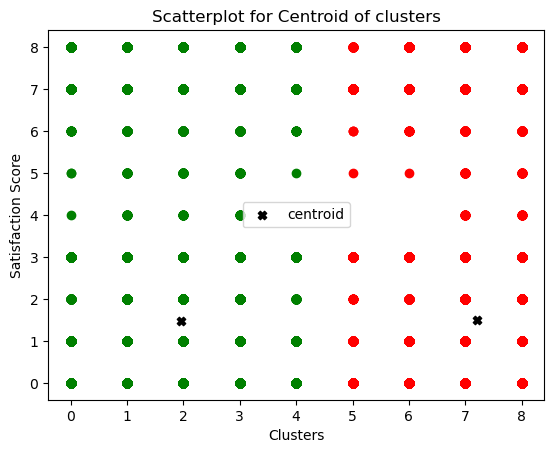

In [171]:
df0 = df[df.satisfaction_cluster==0]
df1 = df[df.satisfaction_cluster==1]
plt.scatter(df0['engagement_score'],df0['experience_score'],color = 'green')
plt.scatter(df1['engagement_score'],df1['experience_score'],color = 'red')
plt.scatter(satisfaction_km.cluster_centers_[:,0],satisfaction_km.cluster_centers_[:,1],color = 'black',marker='X',label = 'centroid')
plt.xlabel('Clusters')
plt.ylabel('Satisfaction Score')
plt.title('Scatterplot for Centroid of clusters')
plt.legend()

Creating Satisfaction Labels

In [172]:
labels = satisfaction_km.labels_
labels = pd.DataFrame(labels)
satisfaction_km_df = pd.concat([satisfaction_X, labels], axis= 1)
satisfaction_km_df = satisfaction_km_df.rename(columns={0:'satisfaction_labels'})
satisfaction_km_df

,engagement_score,experience_score,satisfaction_labels
0,1,0,0
1,2,0,0
2,7,0,1
3,3,0,0
4,6,0,1
...,...,...,...
149996,3,0,0
149997,3,1,0
149998,2,0,0
149999,7,0,1


C:\Users\Niti\AppData\Local\Temp\ipykernel_5480\1672156315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_X['k = 2 satisfaction_labels'] = satisfaction_km.labels_


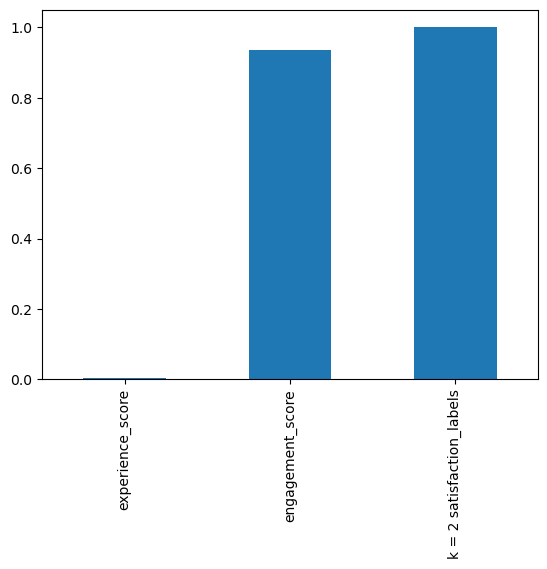

In [173]:
satisfaction_X['k = 2 satisfaction_labels'] = satisfaction_km.labels_
satisfaction_X.corr()['k = 2 satisfaction_labels'].sort_values().plot(kind= 'bar')
plt.show()

c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

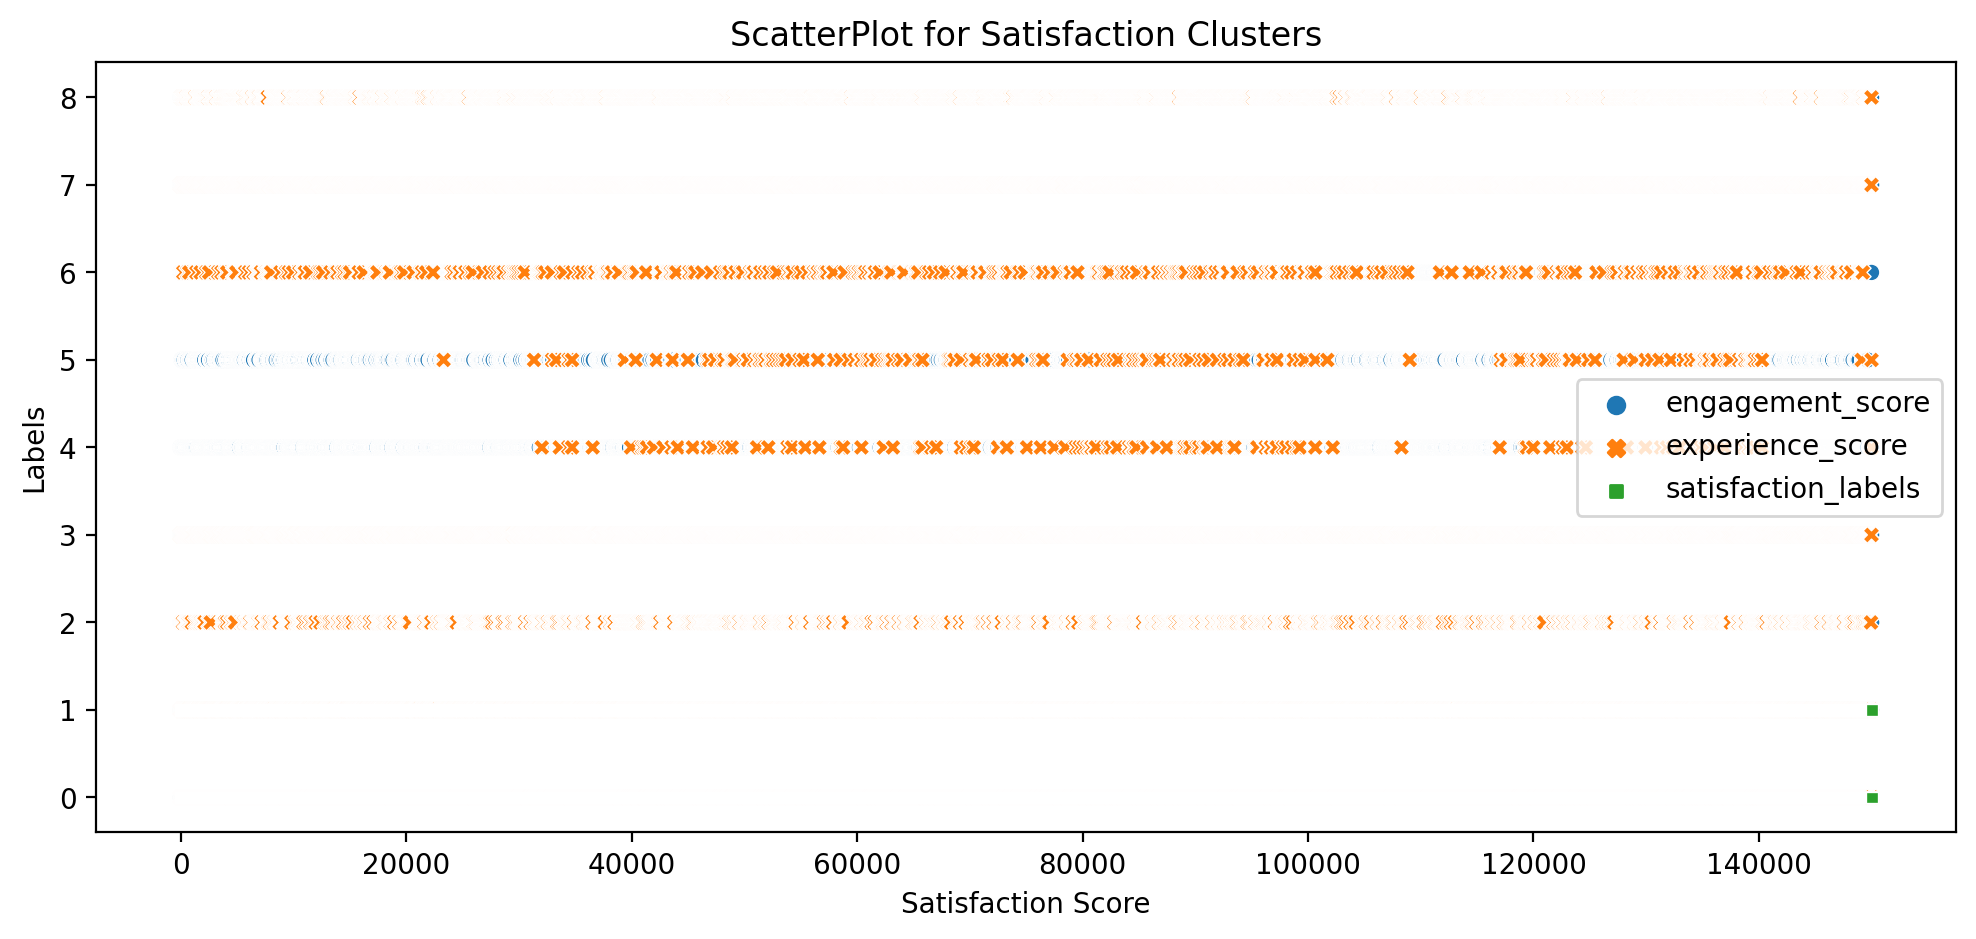

ImportWarning

In [174]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot(data= satisfaction_km_df, cmap = 'magma')
plt.title('ScatterPlot for Satisfaction Clusters')
plt.xlabel('Satisfaction Score')
plt.ylabel('Labels')
plt.show()
ImportWarning

Calculating k

In [45]:
ssd_values = []
for i in range(1,10):
    satisfaction_km = KMeans(n_clusters=i)
    satisfaction_km.fit(satisfaction_scaled)
    ssd_values.append(satisfaction_km.inertia_)

c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Elbow Method

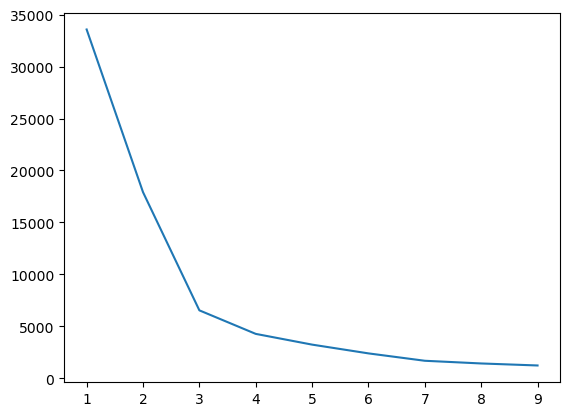

In [46]:
plt.plot(range(1,10), ssd_values)

Here k should be 2 or 3

Task 4.5 - Aggregate the average satisfaction & experience score per cluster. 

In [47]:
avg_satisfaction_score = df.groupby('satisfaction_cluster')['satisfaction_score'].mean().reset_index()
avg_satisfaction_score

,satisfaction_cluster,satisfaction_score
0,0,4.345680
1,1,1.707157


In [48]:
avg_experience_score = df.groupby('experience_cluster')['experience_score'].mean().reset_index()
avg_experience_score

,experience_cluster,experience_score
0,0,0.724105
1,1,2.993870
2,2,6.068582


In [49]:
aggregate_score = pd.merge(avg_satisfaction_score, avg_experience_score,
                           left_on= 'satisfaction_cluster', right_on= 'experience_cluster',
                           suffixes= ('_satisfaction', '_experience'))

In [50]:
aggregate_score

,satisfaction_cluster,satisfaction_score,experience_cluster,experience_score
0,0,4.345680,0,0.724105
1,1,1.707157,1,2.993870


In [51]:
df.to_excel('Telecom_data for ppt.xlsx')

Task 4.7 Model deployment tracking- deploy the model and monitor your model. Here you can use Docker or other MlOps tools which can help you to track your model’s change.  Your model tracking report includes code version, start and end time, source, parameters, metrics (loss convergence), and artifacts or any output file regarding each specific run. (CSV file, screenshot)